In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.preprocessing import MinMaxScaler 
from scipy import stats
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
TSLA_df = pd.read_csv("../data/TSLA_10years_data.csv")
SPY_df = pd.read_csv("../data/SPY_10years_data.csv")
BND_df = pd.read_csv("../data/BND_10years_data.csv")

* Basic statistics to understand the distribution of the data.

In [3]:
TSLA_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.0,2515.000000
mean,133.732657,136.729599,130.533528,133.697908,1.146432e+08,0.0,0.003181
std,121.301286,124.050445,118.267514,121.186898,7.332354e+07,0.0,0.116250
min,9.488000,10.331333,9.403333,9.578000,1.062000e+07,0.0,0.000000
25%,19.370667,19.806334,18.951667,19.401667,6.939015e+07,0.0,0.000000
50%,103.000000,108.428001,99.133331,103.067329,9.567210e+07,0.0,0.000000
75%,237.385002,243.044998,233.111664,237.989998,1.324342e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,0.0,5.000000


In [4]:
SPY_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000,2515.0,2515.0
mean,336.645419,338.516819,334.617484,336.713126,8.476471e+07,0.022739,0.0,0.0
std,126.789696,127.439044,126.056573,126.815737,4.433420e+07,0.181511,0.0,0.0
min,155.426545,156.926777,153.758485,155.869797,2.027000e+07,0.000000,0.0,0.0
25%,233.768448,236.083089,231.688427,234.190041,5.771670e+07,0.000000,0.0,0.0
50%,309.175535,310.705123,306.601219,308.779480,7.421450e+07,0.000000,0.0,0.0
75%,422.047793,424.310222,419.193885,421.886749,9.750170e+07,0.000000,0.0,0.0
max,639.460022,639.849976,635.539978,637.179993,5.072443e+08,1.966000,0.0,0.0


In [5]:
BND_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000,2515.0,2515.0
mean,68.563507,68.663456,68.456455,68.561181,4.470264e+06,0.008887,0.0,0.0
std,4.518363,4.525471,4.507657,4.517074,2.901400e+06,0.040685,0.0,0.0
min,61.174283,61.249758,61.144077,61.204468,0.000000e+00,0.000000,0.0,0.0
25%,64.730452,64.787891,64.642583,64.718342,2.228950e+06,0.000000,0.0,0.0
50%,67.708689,67.827483,67.565424,67.713684,4.166800e+06,0.000000,0.0,0.0
75%,71.921594,72.080329,71.811007,71.935459,5.921400e+06,0.000000,0.0,0.0
max,77.378749,77.413307,77.283688,77.318253,3.396300e+07,0.369000,0.0,0.0


* Check all columns have appropriate data types and check for missing values

In [6]:
TSLA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2515 non-null   object 
 1   Open          2515 non-null   float64
 2   High          2515 non-null   float64
 3   Low           2515 non-null   float64
 4   Close         2515 non-null   float64
 5   Volume        2515 non-null   int64  
 6   Dividends     2515 non-null   float64
 7   Stock Splits  2515 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 157.3+ KB


In [7]:
SPY_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2515 non-null   object 
 1   Open           2515 non-null   float64
 2   High           2515 non-null   float64
 3   Low            2515 non-null   float64
 4   Close          2515 non-null   float64
 5   Volume         2515 non-null   int64  
 6   Dividends      2515 non-null   float64
 7   Stock Splits   2515 non-null   float64
 8   Capital Gains  2515 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 177.0+ KB


In [8]:
BND_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2515 non-null   object 
 1   Open           2515 non-null   float64
 2   High           2515 non-null   float64
 3   Low            2515 non-null   float64
 4   Close          2515 non-null   float64
 5   Volume         2515 non-null   int64  
 6   Dividends      2515 non-null   float64
 7   Stock Splits   2515 non-null   float64
 8   Capital Gains  2515 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 177.0+ KB


In [9]:
TSLA_df['Date'] = pd.to_datetime(TSLA_df['Date'])
SPY_df['Date'] = pd.to_datetime(SPY_df['Date'])
BND_df['Date'] = pd.to_datetime(BND_df['Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_29624\1627981917.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  TSLA_df['Date'] = pd.to_datetime(TSLA_df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_29624\1627981917.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  SPY_df['Date'] = pd.to_datetime(SPY_df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_29624\1627981917.py:3: FutureWarning: In a future version of pandas, parsing datetimes wi

In [10]:
print("Time interval for TSLA data:", TSLA_df['Date'].min(), "to", TSLA_df['Date'].max())
print("Time interval for SPY data:", SPY_df['Date'].min(), "to", SPY_df['Date'].max())
print("Time interval for BND data:", BND_df['Date'].min(), "to", BND_df['Date'].max())

Time interval for TSLA data: 2015-08-10 00:00:00-04:00 to 2025-08-08 00:00:00-04:00
Time interval for SPY data: 2015-08-10 00:00:00-04:00 to 2025-08-08 00:00:00-04:00
Time interval for BND data: 2015-08-10 00:00:00-04:00 to 2025-08-08 00:00:00-04:00


In [11]:
TSLA_df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [12]:
SPY_df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64

In [13]:
BND_df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64

We do not have missing value

* Normalize the data 

In [14]:
scaler = MinMaxScaler()
TSLA_df['Close'] = scaler.fit_transform(TSLA_df[['Close']])

* Visualize the closing price over time to identify trends and patterns

In [15]:
TSLA_df["Close"].head()

0    0.013817
1    0.013283
2    0.013396
3    0.014011
4    0.014102
Name: Close, dtype: float64

In [16]:
TSLA_df.sort_values(by='Date', inplace=True)

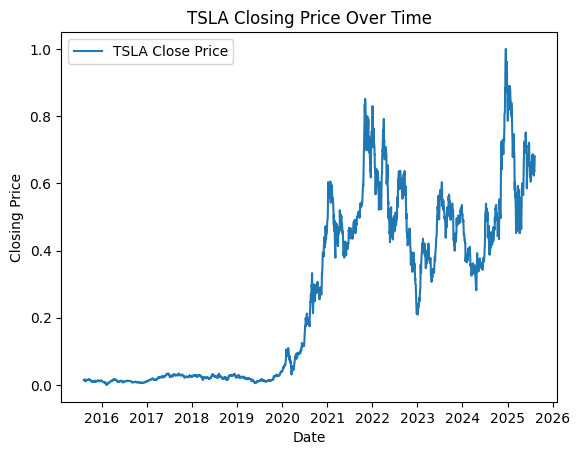

In [17]:
plt.plot(TSLA_df['Date'], TSLA_df['Close'], label='TSLA Close Price')
plt.title('TSLA Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

* Calculate daily percentage

In [18]:
TSLA_df["Daily_Change"] = TSLA_df['Close'].pct_change() * 100

In [19]:
TSLA_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Change
0,2015-08-10 00:00:00-04:00,15.876667,16.198000,15.736667,0.013817,62788500,0.0,0.0,NaN
1,2015-08-11 00:00:00-04:00,15.810000,15.953333,15.629333,0.013283,63973500,0.0,0.0,-3.867855
2,2015-08-12 00:00:00-04:00,15.666667,15.984667,15.516000,0.013396,55920000,0.0,0.0,0.853788
3,2015-08-13 00:00:00-04:00,15.990667,16.431999,15.941333,0.014011,70338000,0.0,0.0,4.592593
4,2015-08-14 00:00:00-04:00,16.482668,16.528667,16.118000,0.014102,65472000,0.0,0.0,0.647493


* Plot the daily percentage change

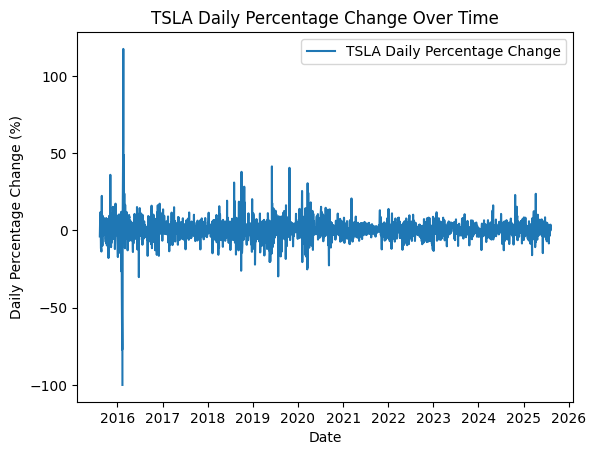

In [20]:
plt.plot(TSLA_df["Date"] , TSLA_df["Daily_Change"], label='TSLA Daily Percentage Change')
plt.title('TSLA Daily Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')
plt.legend()
plt.show()

* Analyze rolling means and standard deviations

Text(0, 0.5, 'Value')

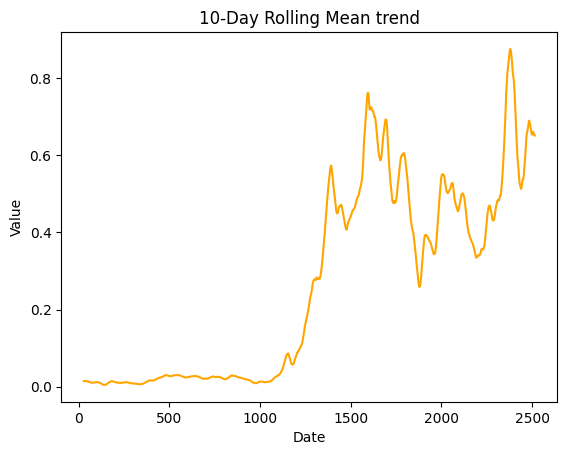

In [21]:
TSLA_df["Close"].rolling(window=30).mean().plot(label='10-Day Rolling Mean', color='orange')
plt.title('10-Day Rolling Mean trend')
plt.xlabel('Date')
plt.ylabel('Value')

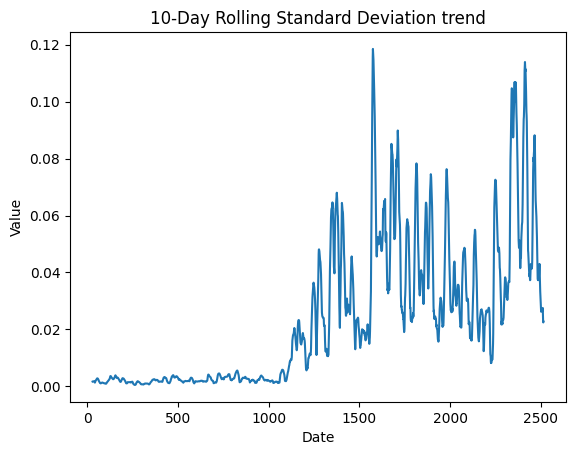

In [22]:
TSLA_df["Close"].rolling(window=30).std().plot(label='10-Day Rolling Std Dev')
plt.title('10-Day Rolling Standard Deviation trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

* Outlier detection 

In [23]:
TSLA_df.dropna(inplace=True)

In [24]:
TSLA_df["Daily_Change"].describe()

c:\Users\HP\OneDrive\Desktop\Tenx\Forecast_Financial_Data\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    2514.000000
mean             inf
std              NaN
min      -100.000000
25%        -2.420708
50%         0.166592
75%         3.037374
max              inf
Name: Daily_Change, dtype: float64

In [25]:
# Replace inf/-inf with NaN and drop NaN values
TSLA_df["Daily_Change"].replace([np.inf, -np.inf], np.nan, inplace=True)
TSLA_df.dropna(subset=["Daily_Change"], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_29624\3997975334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  TSLA_df["Daily_Change"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [26]:
TSLA_df["Daily_Change"].describe()

count    2513.000000
mean        0.318635
std         6.888032
min      -100.000000
25%        -2.421098
50%         0.165491
75%         3.026993
max       117.477973
Name: Daily_Change, dtype: float64

In [27]:
TSLA_df["Z_Score_of_daily_change"] = np.abs(stats.zscore(TSLA_df["Daily_Change"]))

In [28]:
TSLA_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Change,Z_Score_of_daily_change
1,2015-08-11 00:00:00-04:00,15.810000,15.953333,15.629333,0.013283,63973500,0.0,0.0,-3.867855,0.607913
2,2015-08-12 00:00:00-04:00,15.666667,15.984667,15.516000,0.013396,55920000,0.0,0.0,0.853788,0.077709
3,2015-08-13 00:00:00-04:00,15.990667,16.431999,15.941333,0.014011,70338000,0.0,0.0,4.592593,0.620614
4,2015-08-14 00:00:00-04:00,16.482668,16.528667,16.118000,0.014102,65472000,0.0,0.0,0.647493,0.047753
5,2015-08-17 00:00:00-04:00,17.037333,17.106001,16.700666,0.015781,107650500,0.0,0.0,11.901892,1.681984


* Days with unusually high or low returns

In [38]:
TSLA_df[TSLA_df["Z_Score_of_daily_change"]  > 3].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 13 to 2431
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        30 non-null     object 
 1   Open                        30 non-null     float64
 2   High                        30 non-null     float64
 3   Low                         30 non-null     float64
 4   Close                       30 non-null     float64
 5   Volume                      30 non-null     int64  
 6   Dividends                   30 non-null     float64
 7   Stock Splits                30 non-null     float64
 8   Daily_Change                30 non-null     float64
 9   Z_Score_of_daily_change     30 non-null     float64
 10  Closing_Price_Rolling_Mean  30 non-null     int64  
 11  Closing_Price_Rolling_STD   30 non-null     int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 3.0+ KB


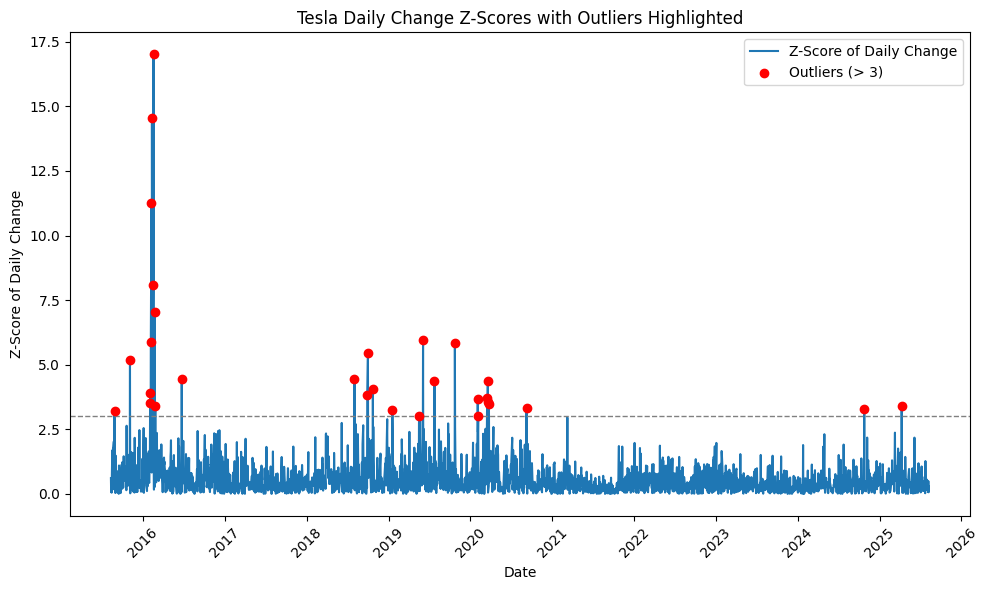

In [37]:
# Filter rows where Z-score > 3
outliers = TSLA_df[TSLA_df["Z_Score_of_daily_change"] > 3]

# Plot Z-scores
plt.figure(figsize=(10, 6))
plt.plot(TSLA_df["Date"], TSLA_df["Z_Score_of_daily_change"], label="Z-Score of Daily Change")
plt.scatter(outliers["Date"], outliers["Z_Score_of_daily_change"], color="red", label="Outliers (> 3)", zorder=5)

# Add labels and title
plt.axhline(3, color="gray", linestyle="--", linewidth=1)
plt.xlabel("Date")
plt.ylabel("Z-Score of Daily Change")
plt.title("Tesla Daily Change Z-Scores with Outliers Highlighted")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


* Augmented Dickey-Fuller test on the closing prices and daily returns

Null hypothesis (H₀): The series has a unit root → it’s non-stationary.

Alternative hypothesis (H₁): The series is stationary.

In [30]:
result = adfuller(TSLA_df["Daily_Change"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -14.919880884882938
n_lags: 1.4168234933853204e-27
p-value: 1.4168234933853204e-27
Critial Values:
   1%, -3.4329673628206447
Critial Values:
   5%, -2.862696337194766
Critial Values:
   10%, -2.567385563035082


Since p is lessthan 0.5 it reject null hypothesis and therefore the series is stationary.

In [31]:
result = adfuller(TSLA_df["Close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -1.3553897443168665
n_lags: 0.6034663087990926
p-value: 0.6034663087990926
Critial Values:
   1%, -3.4329842325121738
Critial Values:
   5%, -2.862703786843828
Critial Values:
   10%, -2.567389529328891


Since 0.603 > 0.05 (for a 95% confidence test), we fail to reject the null hypothesis.

The null hypothesis in the ADF test is that the series has a unit root (i.e., it’s non-stationary).

* Calculate rolling means and standard deviations of DR

In [32]:
TSLA_df["Closing_Price_Rolling_Mean"] = TSLA_df["Daily_Change"].rolling(window=30).mean().isnull().sum()
TSLA_df["Closing_Price_Rolling_STD"] = TSLA_df["Daily_Change"].rolling(window=30).std().isnull().sum()

* Compute key risk metrics VaR

In [33]:
# it tells you the maximum loss you could expect over a given period at a certain confidence level
VaR_95 = TSLA_df["Daily_Change"].quantile(0.05)
print(f'Value at Risk (VaR) at 95% confidence level: {VaR_95:.2f}%')

Value at Risk (VaR) at 95% confidence level: -8.09%


This means on a typical day, 95% of the time the loss will be smaller than 8.09%.